In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv('weatherHistory.csv')

In [3]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)
weather_df['day_of_year'] = weather_df['Formatted Date'].dt.dayofyear
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day_of_year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253


In [5]:
wd = weather_df.set_index('Formatted Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
wd.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),day_of_year
Formatted Date,,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000,365
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0.0,1011.985000,1
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0.0,1010.384167,2
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0.0,1021.170833,3
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0.0,981.770833,4


In [6]:
wdd = wd[['Temperature (C)', 'day_of_year']].copy()
wdd.head()

,Temperature (C),day_of_year
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,365
2006-01-01 00:00:00+00:00,4.075000,1
2006-01-02 00:00:00+00:00,5.263194,2
2006-01-03 00:00:00+00:00,2.340509,3
2006-01-04 00:00:00+00:00,2.251852,4


In [7]:
wdd.groupby('day_of_year')
wdd.head()

,Temperature (C),day_of_year
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,365
2006-01-01 00:00:00+00:00,4.075000,1
2006-01-02 00:00:00+00:00,5.263194,2
2006-01-03 00:00:00+00:00,2.340509,3
2006-01-04 00:00:00+00:00,2.251852,4


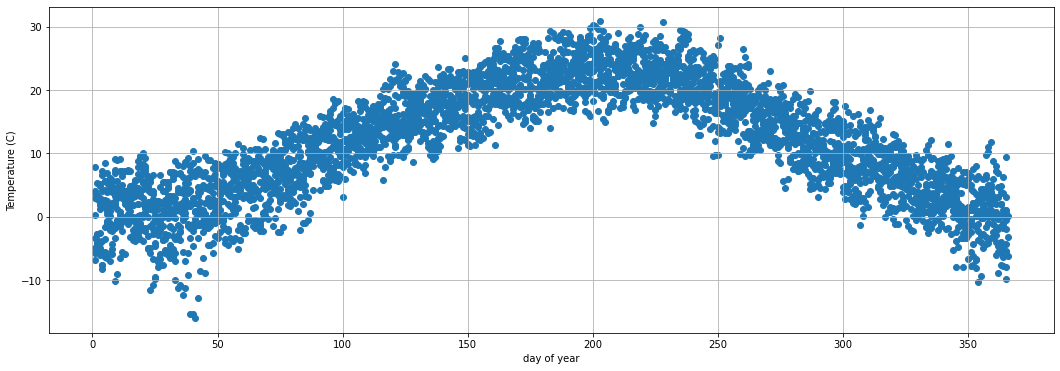

In [8]:
plt.figure(figsize=(18,6)) 
plt.scatter(wdd['day_of_year'], wdd['Temperature (C)'], marker='o')
plt.grid()

plt.ylabel('Temperature (C)')
plt.xlabel('day of year')

plt.savefig('Weather.jpg')

In [9]:
X_train = np.array(wdd['day_of_year'])
Y_train = np.array(wdd['Temperature (C)'])
X_train = X_train.reshape(-1 ,1)
Y_train = Y_train.reshape(-1 ,1)

In [10]:
class percepton:
    def __init__(self):
        pass

    def fit(self, X_train, Y_train, epochs):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))

        lr = 0.00001
        self.w = np.random.rand(1,1)
        self.b = np.random.rand(1,1)
        self.Error = []
        for j in range(epochs):
            for i in range(self.X_train.shape[0]):
                y_pred = np.matmul(self.X_train[i], self.w) + self.b
                e = self.Y_train[i] - y_pred

                self.w += lr * self.X_train[i]* e
                self.b += lr*e

                Y_pred = np.matmul(self.X_train, self.w) + self.b
                error = np.mean(np.abs(self.Y_train - Y_pred))
                self.Error.append(error)
                
                np.save('w', self.w)
                np.save('b', self.b)

        return self.Error, self.w, self.b

    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        return Y_pred

    def evaluate(self, X_test, Y_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        error = np.mean(np.abs(Y_test - Y_pred))
        return error

    def pltlost(self):
        x = np.arange(0, len(self.Error))
        plt.plot(x, self.Error)
        plt.ylabel('Loss')
        plt.xlabel('Iteration')
        plt.show()

In [12]:
model = percepton()

Error, w, b = model.fit(X_train, Y_train, 3)
prediction = model.predict(X_train)
mae = model.evaluate(X_train, Y_train)
print('The mean absolute error is:', mae)

The mean absolute error is: 12.399145229377183


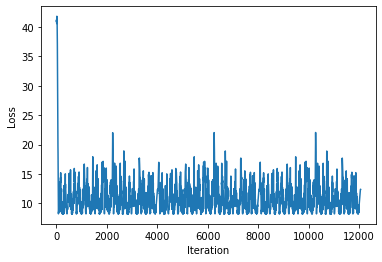

In [13]:
model.pltlost()

In [16]:
predic = model.predict([1])
print('The prediction is:', predic)

The prediction is: [[0.27549327]]
